<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/HW7/HW7clusteringGenes_RPradataDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=ad08452150e3b1411ec801a0beaa50d34ab8121e65e0dfb54015610d9f341fd9
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=8f0ae9b9b23c2f2f7aca4bc2183cd2c525a01a746ff6cccec84665d46009b0db
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv",delimiter=',', header=0)

                    #https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv
genes = genes.drop(genes.columns[0], axis = 1)

In [4]:
genes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,...,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4220,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,...,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4221,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,...,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4222,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,...,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187


make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [5]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

There are several ways one can handle missing values, such as deleting them, interpolating, or regression. But the goal is that we don't want these missing values to obscure/mislead/negatively affect our clustering process.

In [6]:
genes.shape

(4224, 74)

https://github.com/ResidentMario/missingno

<Axes: >

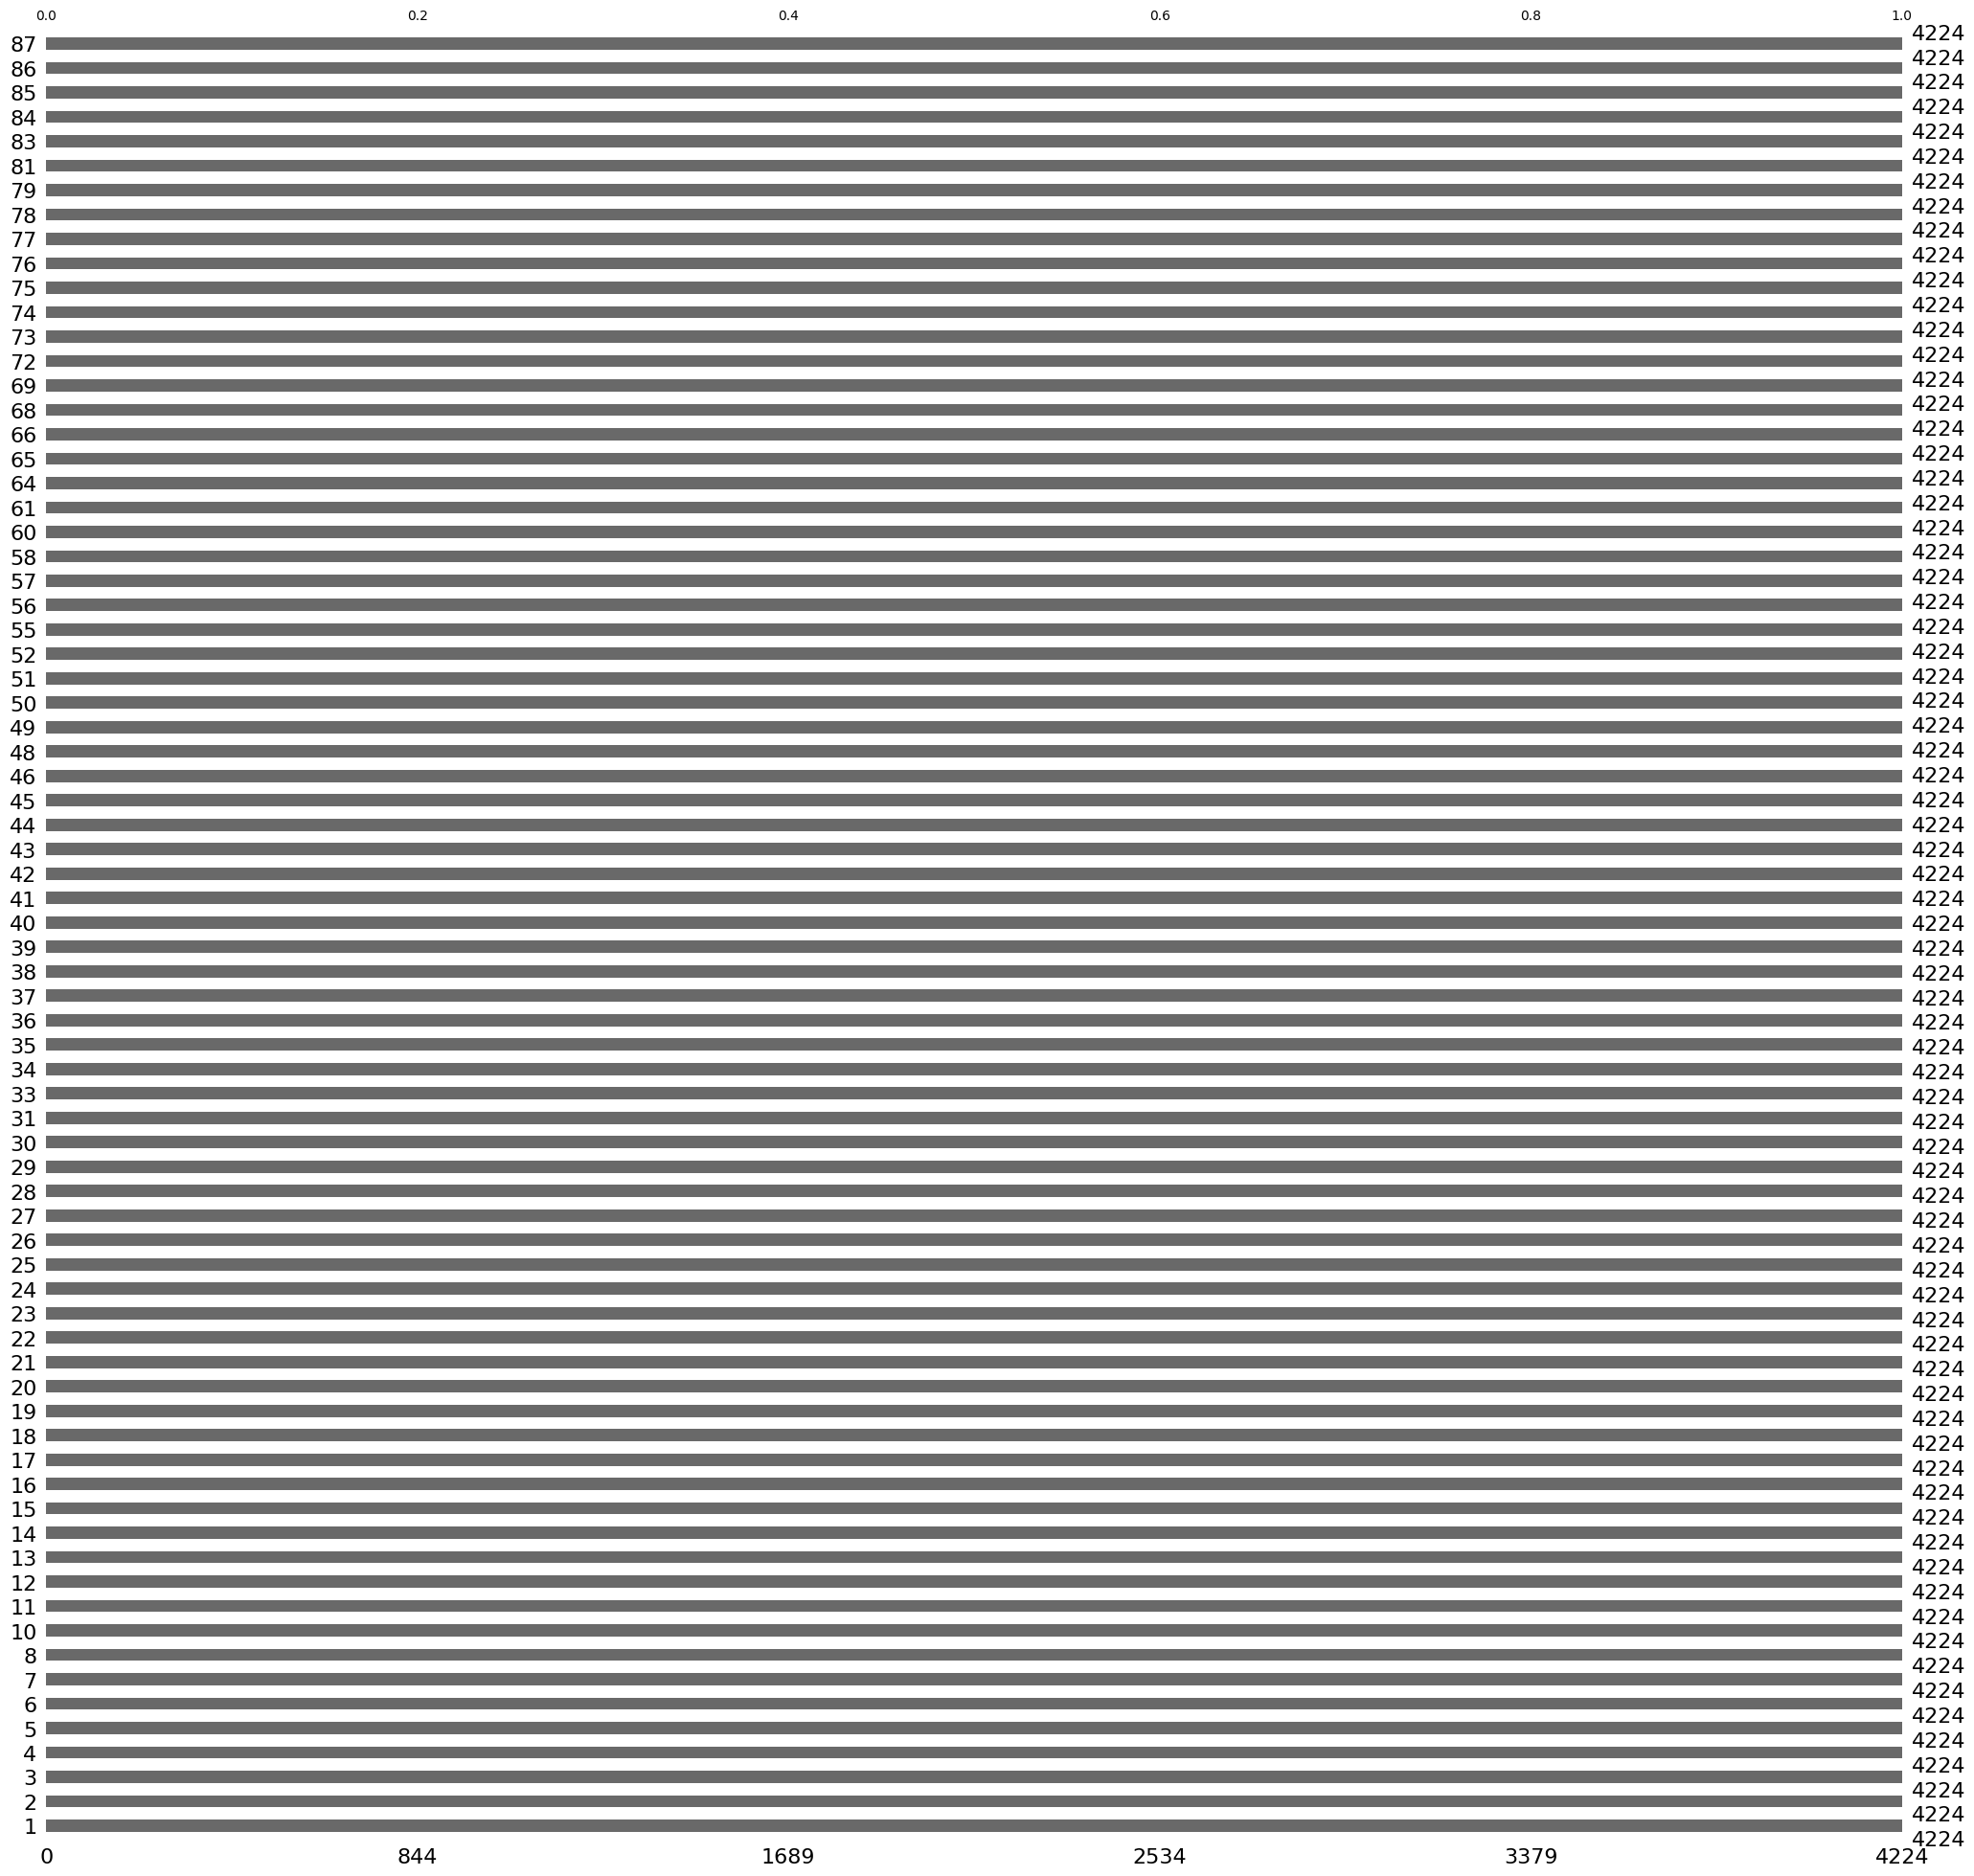

In [7]:
#missing values set as NaN

# genes = genes.replace(to_replace='None', value=np.nan).dropna()

import missingno as msno

msno.bar(genes)

Figure 1: Bar plot visualization of the "missing values" of the kidney cancer dataset. The row labels represent the columns in the dataframe, which are the cancer samples from 74 patients. The column labels in the bar represent the rows in the dataframe, which are the different cDNA clones (feature).


From the plot we have, all of the bars seem to be "complete" in the sense that there are no "shortened" bars. With this, it does not seem that there is any missing data, hence we can move forward with the dataset we have.


## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

note to self: whitening: remove the covariance (by diagonalizing the transforming the data with a matrix that diagonalizes the covariance matrix)

we want independence (between datapoints?)

A whitening transformation or sphering transformation is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose covariance is the identity matrix, meaning that they are uncorrelated and each have variance 1.[1] The transformation is called "whitening" because it changes the input vector into a white noise vector. - wikipedia

another note to self:
one way of whitening is: ZCA (Zero-phase Component Analysis) whitening is a technique used to preprocess data in machine learning by decorrelating its features and normalizing their variances. ZCA whitening is an extension of PCA (Principal Component Analysis) whitening. While PCA whitening removes correlations between features, ZCA whitening takes an additional step to ensure that the transformed features have a covariance matrix that is close to the identity matrix.

to do that, will need to type in !pip install zca; https://pypi.org/project/zca/

In [8]:
# from zca import ZCA
# import numpy as np
# X = genes # data array
# trf = ZCA().fit(X)
# X_whitened = trf.transform(X)
# X_reconstructed = trf.inverse_transform(X_whitened)
# assert(np.allclose(X, X_reconstructed))

#^is an example of using ZCA

#assert expression, message

# expression: The condition that you expect to be True. If this condition is False, the assert statement raises an AssertionError.

# np.allclose :  The function returns True if all elements of a and b are approximately equal and False otherwise.

https://learndataa.com/2020/09/15/data-preprocessing-whitening-or-sphering-in-python/


##But for this dataset, I am just normalizing.
Because there doesn't seem to be "datagaps", as seen in Figure 1, it is helpful to keep things simple, as needed. We want to make sure all the features weigh the same (to help "scale"), by subtracting the mean from the data, and dividing by the standard deviation.


In [9]:
gmeans = genes.mean(axis=0) #this is over the columns
gstd = genes.std(axis = 0)
scaledgenes = (genes - gmeans)/gstd

scaledgenes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
0,-0.103897,-1.446141,0.541089,-0.308246,0.507009,0.073847,0.180302,0.577329,0.549662,0.125533,...,0.567622,-0.724320,0.067207,-0.613358,0.219205,0.403482,-0.023853,1.131948,0.493144,0.952655
1,-0.739345,0.538731,0.695082,-0.631268,0.204437,0.394590,0.385995,-0.012783,1.164567,0.065605,...,0.838650,-0.966516,-0.339336,-0.585473,0.369871,0.040159,0.512572,0.954836,-0.695000,0.587652
2,0.010246,-0.529508,-0.455327,-0.256998,-0.868557,0.348691,-0.144565,0.063444,0.806040,-0.579669,...,0.037517,-0.993797,-0.082619,-0.353826,0.149292,0.047108,-0.253073,-0.405977,-0.510281,-0.085636
3,-0.464673,-4.950496,0.214552,-0.083841,-0.974344,0.801768,-0.046205,-0.550759,1.493761,0.417471,...,0.387379,-0.218919,-0.292334,-0.695893,2.370376,-0.227993,-2.343507,-0.438080,0.919138,0.169987
4,0.003557,-1.856399,0.236615,-0.774097,0.003863,-0.027835,1.090250,-0.040081,-0.556369,0.380064,...,0.000111,1.083946,0.602657,-0.427996,0.329936,-0.114880,-0.610008,-1.004827,-1.085110,0.167197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,-0.438238,0.467395,-0.144329,-0.814341,-0.556594,0.742724,-0.204185,-0.087302,1.595732,-0.873759,...,0.854336,0.145523,-0.484076,-0.642432,-1.168413,0.047870,2.913275,1.034453,0.155416,-0.589118
4220,-0.437076,-0.039067,-0.146707,-0.551828,-0.403132,0.496870,-0.320757,0.180972,0.997262,-0.460738,...,0.248440,0.608138,-0.439261,-0.828042,0.004971,-0.399965,0.781197,0.958405,0.316096,-0.757193
4221,0.005633,0.429532,-0.266025,-0.345533,-0.137633,0.057942,0.611211,0.698375,0.556934,-0.310445,...,-0.183630,0.133426,-0.448749,-0.243741,-1.026500,0.145400,0.530152,0.586793,0.254677,-0.129414
4222,-0.911678,0.450153,-0.879637,-1.693128,-1.890801,-0.375353,0.379507,0.524872,1.336134,-0.723846,...,0.524655,-1.104574,-2.148759,-1.225279,-1.394413,-0.825273,1.722304,0.508367,0.265593,0.296414


In [10]:

# scaledgenes.mean(0).round(2), scaledgenes.std(0)

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [11]:
skl.manifold.TSNE?


The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

note to self:
scroll down https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html to find the "fit_transform()" in "methods"

problem = we have too many dimensions. we have many features of each 74 patients, and we want to find a way to visualize these in 2 dimensions.

In [12]:
#delete
twodproj = skl.manifold.TSNE(n_components=2, perplexity = 5, early_exaggeration=9.0).fit_transform(scaledgenes)
#default perplexity is 30.0, early exaggeration default is 12

In [13]:
twodproj.shape

(4224, 2)

In [14]:
twodproj_2 = skl.manifold.TSNE(n_components=2, perplexity = 70, early_exaggeration=9.0).fit_transform(scaledgenes)

plot the TSNE 2D projection


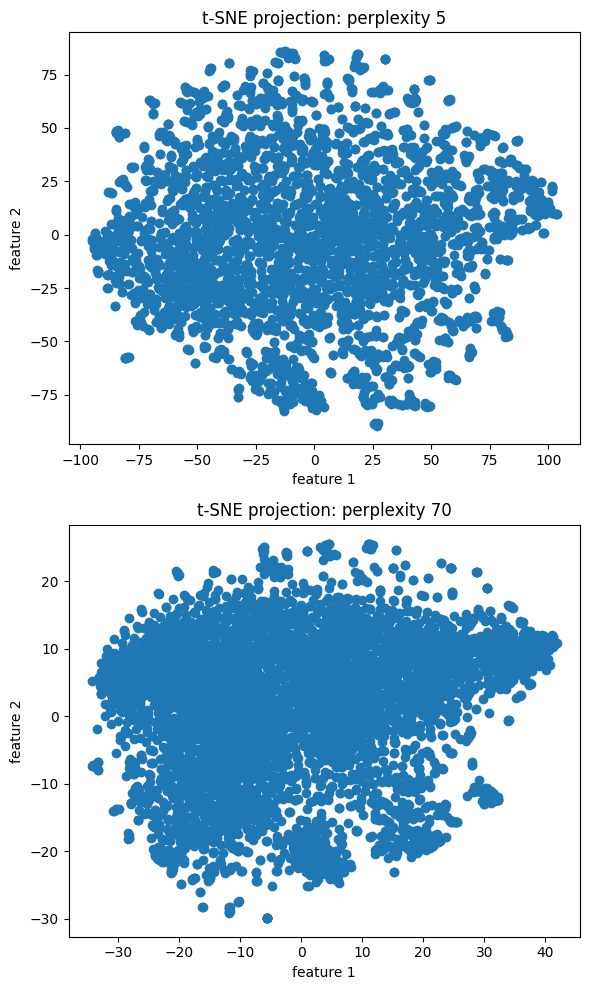

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,10))

# Plot data on the first subplot
axes[0].scatter(twodproj[:, 0], twodproj[:, 1])
axes[0].set_title('t-SNE projection: perplexity 5')
axes[0].set_xlabel('feature 1')
axes[0].set_ylabel('feature 2')
# axes[0].legend()

# Plot data on the second subplot
axes[1].scatter(twodproj_2[:, 0], twodproj_2[:, 1])
axes[1].set_title('t-SNE projection: perplexity 70')
axes[1].set_xlabel('feature 1')
axes[1].set_ylabel('feature 2')
# axes[1].legend()

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()



# Show the plot
plt.show()

Figure 2: 2 dimensional t-SNE projections of the multi-dimensional dataset. The top panel shows the perplexity parameter of 5, and the bottom shows that of 70, intending to explore the difference between them, as the t-SNE is said to be very sensitive to these changes. From the graph, it seems that the projection with the former lower parameter value shows more "distinct" points, while the latter at higher value seems to have the datapoints "more close together", as seen in the projected feature space. Because of this shape slightly differs between them--in the top case, the data points look more "evenly spread", whil in the bottom case, they seem to "bulge" towards the middle, but as we move farther from it, the data gets a little bit more spaced out, i.e.: it looks more "squished" horizontally.

## III-b calculate and plot the UMAP 2D projection

In [16]:
umap.UMAP?

In [17]:
mapper = umap.UMAP(n_components = 2).fit_transform(scaledgenes)
# ax = plt.subplot()
# umap.plot.points(...

note to self:

https://umap-learn.readthedocs.io/en/latest/api.html

^for parameters, fit_transform methods, etc

also https://pypi.org/project/umap-learn/
^see section: Plotting

also read https://umap-learn.readthedocs.io/en/latest/plotting.html


UMAP in DSPS slide #10

In [18]:
# umap.plot.points(mapper)

In [19]:
umap_object = umap.UMAP()
embedding = umap_object.fit_transform(scaledgenes)

#i had an embedding error when i did umap.plot.points(embedding) kind of thing

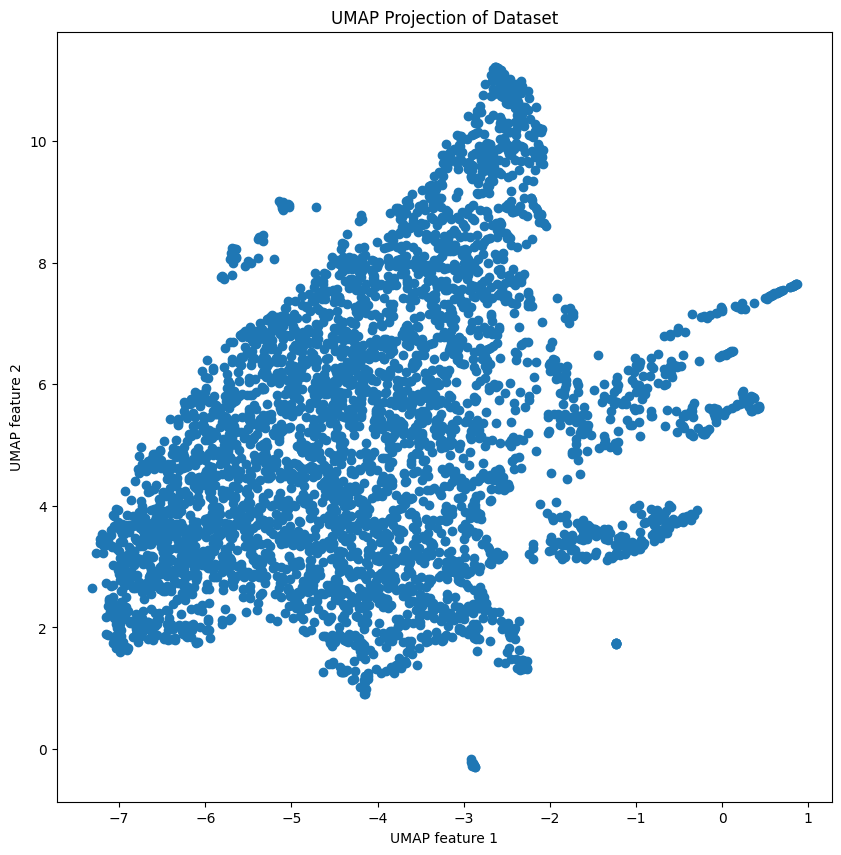

In [20]:
# umap.plot.points(umap_object)

# ax = umap.plot.points(umap_object)
ax = plt.figure(figsize=(10, 10)).add_subplot()

ax.scatter(embedding[:, 0], embedding[:,1])
ax.set_xlabel("UMAP feature 1")
ax.set_ylabel("UMAP feature 2")
ax.set_title("UMAP Projection of Dataset")

plt.show()


Figure 3: The UMAP 2-D projection of the dataset. Compared to the t-SNE projection, this has a different shape. The t-SNE seems to "bulge" towards a center and seems to "squish" horizontally when the perplexity parameter is large, the UMAP projection, in this specific number of neighbor and minimal distance between points parameter, seems to be "squished" slightly diagonally upwards.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [21]:
#delete
def calICVar(data, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    data: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    """

    # datalabels = np.array(np.unique(labels))
    # for dl in datalabels:


    k = len(np.unique(labels))
    icvar = 0.0

    for i in range(k):
        cluster_points = data[labels == i]


        centroid = np.mean(cluster_points, axis=0)

        # Calculate the sum of squared distances within the cluster
        cluster_variance = np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
        icvar += cluster_variance


    #so we need to sort the datapoints based on their clusters

    #sum of the variance of each cluster
    #need to also compute the centroids of cluster...
    ...
    return icvar


cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

It is useful to find the optimal number by plotting the IV vs. cluster number, expecting to see an "elbow" in the shape of the graph.

In [22]:
vars = []

j_values = range(1, 11)

for i in j_values:
  kmeans = cluster.KMeans(n_clusters=i, random_state=0, n_init="auto").fit(scaledgenes)
  datalabels = kmeans.labels_
  icvar = calICVar(scaledgenes, datalabels)
  vars.append(icvar)

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html




In [23]:
vars

[312502.0,
 246650.14467772958,
 224439.31901521474,
 214447.37943332258,
 203110.38632579407,
 196086.217596783,
 190741.6912438239,
 187156.69043002953,
 184496.94192539487,
 180437.71142351243]

In [24]:
# vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters
# ...

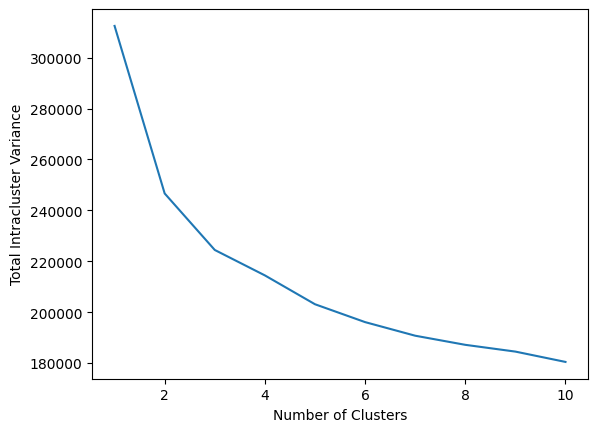

In [25]:
# elbow plot
plt.plot(j_values, vars)
plt.xlabel("Number of Clusters")
plt.ylabel("Total Intracluster Variance")
plt.show()

Figure 4: An elbow plot of the total intracluster variance as a function of cluster number, from 1 to 10. Overall, the plot must decrease as cluster number increases. The determination of the "right" cluster number is done by selecting a "cutoff point" characterized by a significantly less steep slope in the total intracluster variance from that point onwards, hence the "elbow" shape of the plot. In this case, eye-balling the elbow plot, this point seems to be at num. of clusters = 2.

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

It can be hard to exactly pinpoint the point where the plot has significantly less steep slope onwards (the "elbow point") by eye, because in Figure 4, one can also argue that Number of Clusters = 3 could be the case instead. However, I selected 2, as by looking at the elbow graph as a whole (assessing it by comparing the slope shape from 1 to 10), the point at 2 seems to give a more drastic change to the slope compared to 3. The slight slope change at 3 seems to slightly wash away as we increase in cluster number, yet the change at 2 still seem to be most significant.

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [26]:
geneclustersKM = cluster.KMeans(n_clusters=2, random_state=0, n_init="auto").fit(scaledgenes)


In [27]:
cluster_pred_genes = geneclustersKM.fit_predict(scaledgenes) #is "cluster labels"

In [28]:
cluster_pred_genes #prints an array of the labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

In [29]:
# twodproj = skl.manifold.TSNE(n_components=2, perplexity = 70, early_exaggeration=9.0).fit_transform(scaledgenes)
tsne = skl.manifold.TSNE(n_components=2, perplexity = 70, early_exaggeration=9.0)
tsne_data = tsne.fit_transform(scaledgenes)


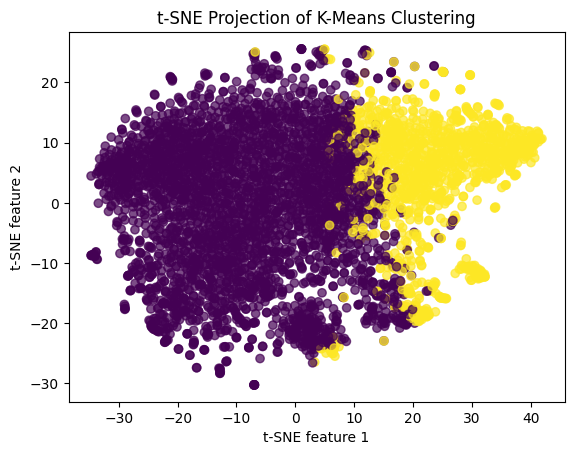

In [30]:
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_pred_genes, alpha = 0.7) #, cmap='viridis', edgecolors='k')
plt.title('t-SNE Projection of K-Means Clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

Figure 5: t-SNE projection of the data with clustering as determined by the k-means method. We have used perplexity = 70 in this plot. Previously, we decided on optimal cluster number = 2. Hence in the plot, the data seems to cluster to almost two different regions.

In [31]:
umap.UMAP?

In [32]:
umap_obj = umap.UMAP()
embedding = umap_obj.fit_transform(scaledgenes)

Text(0.5, 1.0, 'UMAP Projection of K-Means Clustering')

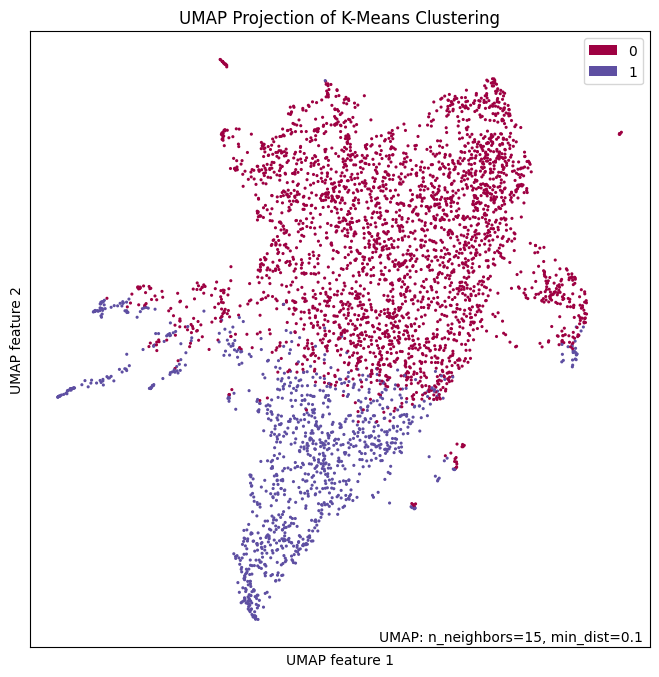

In [33]:
# ax = ... #to get the x and y labels

ax = umap.plot.points(umap_obj, labels = cluster_pred_genes)
ax.set_xlabel("UMAP feature 1")
ax.set_ylabel("UMAP feature 2")
ax.set_title("UMAP Projection of K-Means Clustering")



Figure 6: UMAP projection of the data with clustering determined by the k-means method. The parameters of the projection are the same as that plotted in Figure 3, but here we are using the umap.plot.points function instead of plt.scatter to plot it. As with the t-SNE projection in Figure 6, the clustering also seems to seperate data to almost 2 different regions in a similar way the t-SNE projection does.

In my opinion, this is a sign that the clustering is doing its job quite well. We cluster our data to be able to "distinguish" between points of similar and different features. In the case of k-means (Figs 5 and 6), the fact that the data is clustered to two different regions could indicate how the points with similar features are mapped only to those around (similar to) it.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

^these are parts V and VI of this homework.

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [34]:
dists = sp.spatial.distance.pdist(scaledgenes) #see distances class collab notebook...

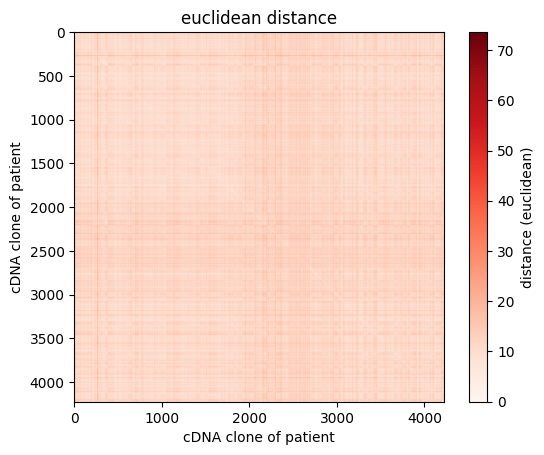

In [35]:
plt.imshow(sp.spatial.distance.squareform(dists), cmap = "Reds") #default is euclidean
plt.title("euclidean distance")
plt.xlabel("cDNA clone of patient")
plt.ylabel("cDNA clone of patient");
plt.colorbar(label="distance (euclidean)");


Figure 7: Colormap of the Euclidean distance distribution between datapoints of the DNA features. From the overall light hue of the plot, it seems that the distances are mostly lower in value, at around 0-20 euclidean distances. When we look closely, we may notice that the diagonal line from top left to bottom right marks an area when the distance is 0. One may also then notice that the shape of the colormap is symmetric about this diagonal.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

In [36]:
(dists.mean())


11.46962029857684

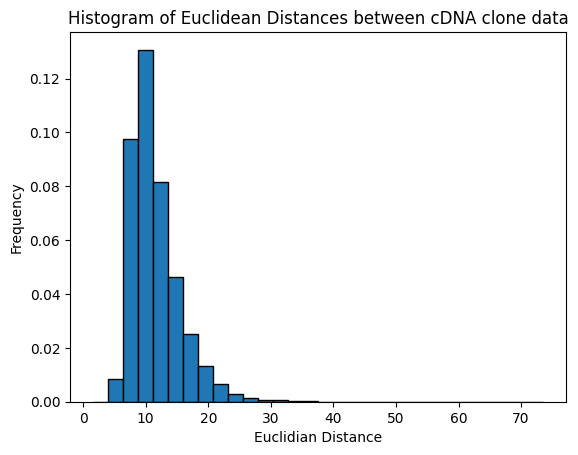

In [37]:
plt.hist((dists), bins = 30, edgecolor = 'black', density = True)
plt.title("Histogram of Euclidean Distances between cDNA clone data")
plt.xlabel("Euclidian Distance")
plt.ylabel("Frequency")
plt.show()

Figure 8: Histogram plot of the Euclidean distances between the DNA feature datapoints. The distribution peaks at around Distance = 10, and it seems to be right-skewed (the majority of the data is more concentrated to the left of the most frequent values). Previously, we calculated the mean to be ~11.47. This also makes sense when we compare our histogram to the colormap Fig. 7, as we have previously seen that the distances do seem to mostly be around this value, hence the ligher hue of the plot.  

In [38]:
multscale = 60
divscale = 1

distmean_nor = ((dists.mean()) - multscale*(10**-1))/divscale
distmean_nor

5.4696202985768405

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

we plotted the histogram of Euclidean distances between the cDNA clone features to find the "means" and set the eps hyperparameter according to that value.

In [39]:
geneclustersDBS = skl.cluster.DBSCAN(eps = distmean_nor, min_samples=15)

geneclusterDBS_data = geneclustersDBS.fit(scaledgenes)

# geneclusterDBS_predict = geneclustersDBS.fit_predict(scaledgenes)

np.unique(geneclusterDBS_data.labels_)

labels_dbscan = geneclusterDBS_data.labels_

#we use DBSCAN here to determine the labels. For k-means in previous part in p. IV,
# we did the same too

we use DBSCAN here to determine the labels. We set the eps hyperparameter to be less than the mean distance, though I had to vary with trial and error, which eps parameter would give "reasonable" clustering. Ideally we want more than one cluster because the point of running this algorithm is to cluster the data based on different features. The determination of this parameter is described more below Figure 10. DBSCAN also identifies outliers.




## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

Unlike K-Means, DBSCAN doesn't require us to state the number of clusters first.

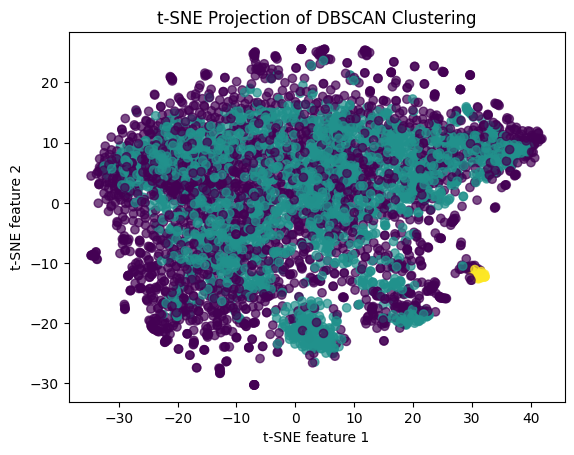

In [40]:
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels_dbscan, alpha = 0.7) #, cmap='viridis', edgecolors='k')
plt.title('t-SNE Projection of DBSCAN Clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# plt.legend()

plt.show()

Figure 9: The t-SNE projection of the DBSCAN clustering. The purple data shows the 1st cluster, and the yellow data shows the 2nd. The turqoise data mark the outliers. From the plot, we can see that the first cluster takes up a significantly larger proportion of the data compared to the 2nd cluster, which seems to group up to one area on the right. However, the outliers also seem to take much of the data, and it is plot on top of the 1st-clustered data.



Text(0.5, 1.0, 'UMAP Projection of DBSCAN Clustering')

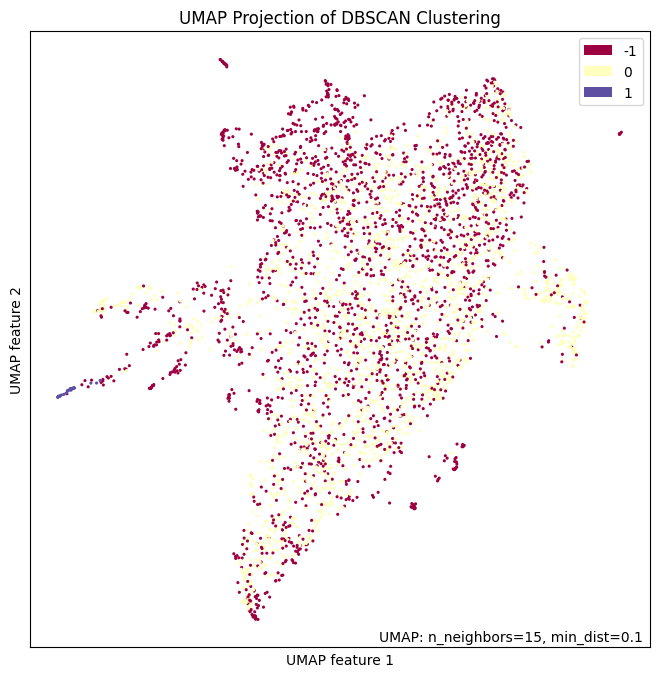

In [41]:

ax = umap.plot.points(umap_obj, labels = labels_dbscan)
ax.set_xlabel("UMAP feature 1")
ax.set_ylabel("UMAP feature 2")
ax.set_title("UMAP Projection of DBSCAN Clustering")

Figure 10: The UMAP Projection of the DBSCAN clustering. The color legend shows the clustering labels. "-1" marks the outliers. The clustering proportion in this plot seems to be similar to that of the t-SNE projection. The "first-clustered" data and the outliers are plotted on top of each other, and each also take approximately half of the dataset. The "second-clustered" data is seen to take a very small proportion of the data, all such points also "gathered" to one side of the 2-D-projected feature space graph.



Further description:

Initially, I only set the eps equal to the mean value, and DBSCAN only gave one cluster in the dataset. Then, discussion during office hours suggested that we decrease the eps values to find more clusters. However, when the value was to small (i.e. I tried multscale = divscale = 70 hence eps = 0.6), everything became outliers.  A reason for why the outliers dominate as we move on to smaller eps values might be related to that it only allows a certain "eps" distance to be part of a cluster. Most of the distances between points would be larger than the eps distance at a certain point. Hence, I increased the eps value again.
At the eps ~ 4.47, I had 4 clusters, but most of the data were still outliers. When I increased the value to 6.47, the clustering was back to only one cluster. So I decided that a "reasonable" clustering would result from an eps value between these two numbers. I then ran it with eps ~ 5.47, and the data finally has two clusters.

(However, as seen in the Figures, the outliers seem to take up a lot of the dataset. Moreover, the clustering plots slightly differently with the t-SNE and UMAP projections, as described below the Figures above.)<-describe in figures


In [42]:
outlier_num = len(labels_dbscan[labels_dbscan == -1])
data0_num = len(labels_dbscan[labels_dbscan == 0])
data1_num = len(labels_dbscan[labels_dbscan == 1])

print("Number of Outliers in the DBSCAN Clustering: {:.2f}".format(outlier_num))
print("Number of Cluster 0 Datapoints: {:.2f}".format(data0_num))
print("Number of Cluster 1 Datapoints: {:.2f}".format(data1_num))


Number of Outliers in the DBSCAN Clustering: 2101.00
Number of Cluster 0 Datapoints: 2090.00
Number of Cluster 1 Datapoints: 33.00


 As calculated, with these hyperparameter values (eps~5.47 and min_samples = 15), the number of outliers is 2101, which is almost half of the entire dataset, a significant number. This means that the method only clusters the other half of the dataset, while one cluster has a significantly larger number of datapoints than the other.  

  

Alternatively, I also could change the min_samples hyperparameter, as the DBSCAN can be extremely sensitive to it too.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

Instead of having to decide number of clusters, hierarchical clustering calculates distances between clusters and single points (linkage)

choose ward linkage and plot the dendrogram of the clusters

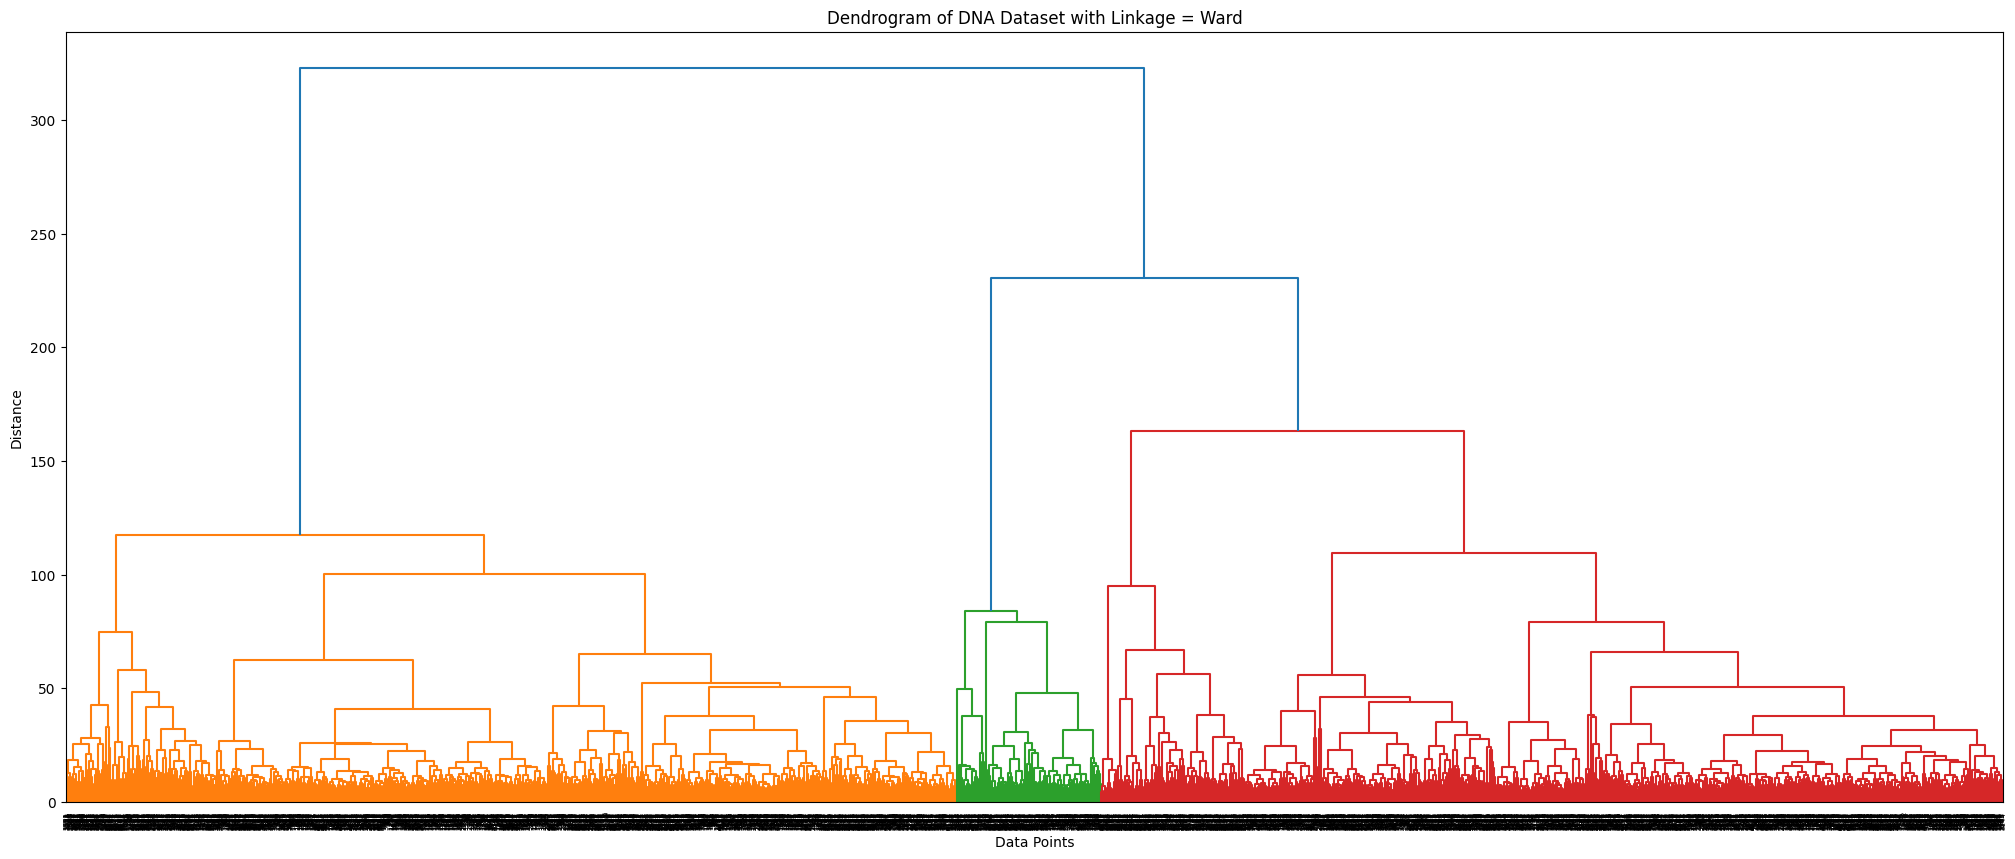

In [43]:
Z = linkage(scaledgenes, 'ward') #the linkage type is the 2nd hyperparameter
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title("Dendrogram of DNA Dataset with Linkage = Ward")

plt.show()

#this first

#threshold


#y axis is the distance (linkage related, agglometrative)

#there seems to be 4 clusters; it takes a long distance to move above, until the clusters combine.


Figure 11: A "ward"-linkage dendrogram of the DNA data point arrangement, as are they merged into clusters, as well as the distances of the points (y-axis). This shows a hierarchical relationship between the data points and clusters. From this dendrogram, we can choose the number of "optimal" clusters by looking at the hierarchical relationship. We can see that there are very many branches (or "mini clusters") as we move down to smaller Distance value. However, if we choose to draw a "threshold line" at Distance = 150, that line would intersect with 4 branches of the map. Each branch leads to one "significant" cluster. The reason why I called this so, and hence the reason why I selected these 4 to be so, is that it takes a large distance, compared to the total distance range, for them to "combine" (Willow helped me think about this).  But it also depends on interpretation. For example, if one chooses to draw the threshold line at Distance = 200, we would have 3 significant clusters. (Though, I think it is much easier to visualize the clustering this way compared to the elbow method.)

For this study, I decided to stick with number of clusters = 4, from this dendrogram.

repeat with a different linkage and comment on differences

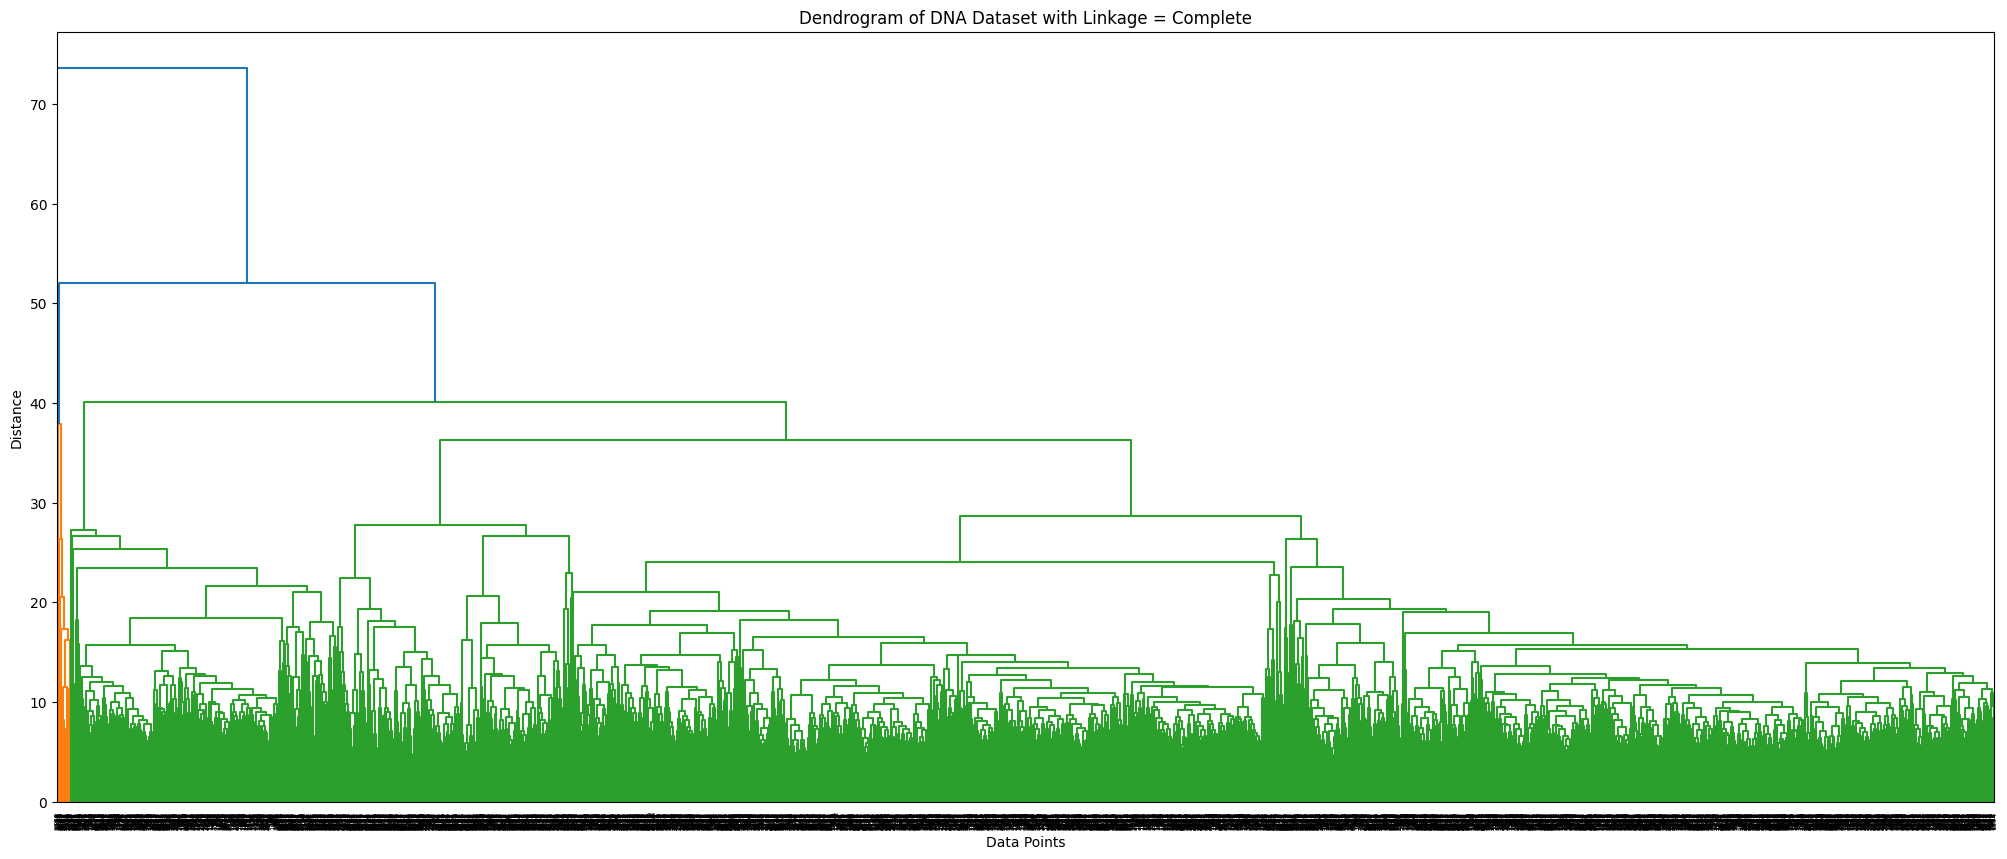

In [44]:
Z = linkage(scaledgenes, 'complete') #the linkage type is the 2nd hyperparameter
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title("Dendrogram of DNA Dataset with Linkage = Complete")

plt.show()

Figure 12: A "complete"-linkage dendrogram of the dataset. Most of the data are categorized in "green", while there is a very small proportion of data categorized in "orange" in the far left of the plot. In this plot, it seems to be very hard to determine the number of "optimal" clusters. Furthermore, the fact that "green" categorized data largely dominates the set could mean this the clustering might not be particularly useful if our intention was to look at different kinds of data (cDNA clones in our case).


Therefore, we are going to stick with the "ward"-linkage dendrogram in Figure 11.

In [45]:
#from the WARD linkage, which is better

# AFTER determining the number of clusters from the dendrogram:

clusteringAg = skl.cluster.AgglomerativeClustering(n_clusters= 4, metric = 'euclidean').fit(scaledgenes)

#default linkage is already 'ward'

#this is AFTER determining the number of clusters from the dendrogram.

clusteringAg.labels_.shape
clusteringAg.labels_

dir(clusteringAg)

clusteringAg_dendro_labels = clusteringAg.labels_



# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



This part is asking to re-run the agglomerative clustering, not with the dendrogram-determined number of clusters, but from the number of clustered determined by the k-means method.

In [46]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=2, metric = "euclidean").fit(scaledgenes)

In [47]:
clusteringAg_km_labels = geneclustersAg.labels_

## VI-c plot the 2D TSNE projection colorcoded as before

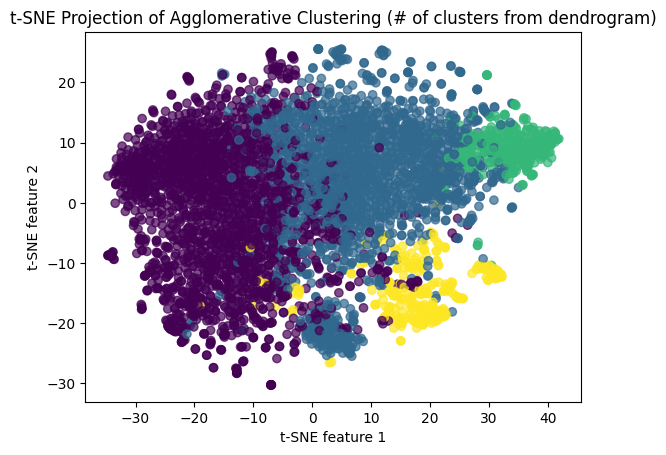

In [48]:
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusteringAg_dendro_labels, alpha = 0.7) #, cmap='viridis', edgecolors='k')
plt.title('t-SNE Projection of Agglomerative Clustering (# of clusters from dendrogram)')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

plt.show()

Figure 13: The t-SNE projection of the Agglomerative Clustering, using number of clusters determined by the dendrogram in Figure 11. It shows 4 different clusters. Although from this plot it may be hard to see specifically how much of the data each cluster takes, because some points seem to overplot each other, we can still identify each cluster quite clearly as seperate regions. Similar to what was described in part IV, we would like the clustering to map and seperate the data by similar and distinct features, and the projection shows how the clustering strives to do so.

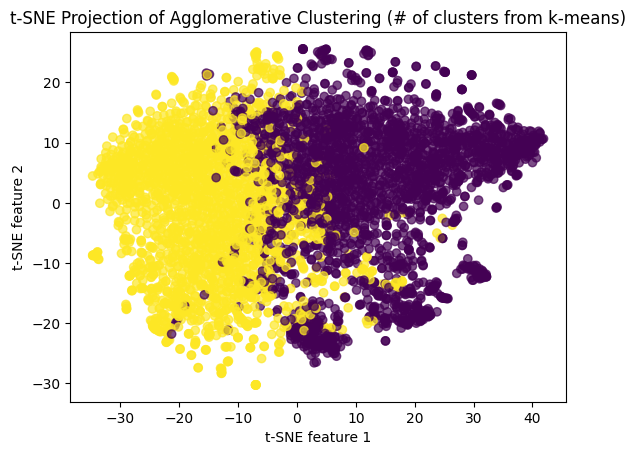

In [49]:
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusteringAg_km_labels, alpha = 0.7) #, cmap='viridis', edgecolors='k')
plt.title('t-SNE Projection of Agglomerative Clustering (# of clusters from k-means)')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')


plt.show()

Figure 14: The t-SNE projection of the Agglomerative Clustering, using the number of clusters determined by the K-Means method in part IV. There are 2 clusters, as with Figure 5. Both figures seem to have a very similar cluster distribution; however, the "positions" for the clusters with respect to the 1st feature axis are reversed. Regardless, they both still have an almost equal distribution between clusters (almost half-and-half), although one feature might still take a slightly larger proportion of the data than the other.



In this regard, we can then infer that the agglomerative and k-means clustering both perform similarly well with the number of clusters determined by the k-means elbow method. The way I interpret this is part of the study is that we might not need to run a certain clustering algorithm by sticking to only one specific procedure --sometimes in different fields of research, we need to always adjust our measurements, and to do so, sometimes we need to take consideration of other techniques/parameters that strives to achieve the same goal.

As an example here, if the dendrograms had not plotted what we expected for (in the hierarchical clusering visualizations), even with different linkages, we could find the optimal cluster using the elbow method in k-means. And we could compare what we have gotten when we run the k-means clustering with said determined cluster number with that run with the agglomerative clustering.


# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

Discussion:

In this study, we have examined different clustering methods to cluster "cancerous" genes, from a certain dataset with multi dimensions. We have shown that K-Means works quite well with a small number of clusters, as it quite neatly classifies to two clusters as seen in the 2-D feature projection. However, as it depends on calculations related to distances, future work would be needed to assess this method in higher numbers of clusters, which might lead to a more complicated configuration. Moreover, one would still need to declare the number of clusters before running this method, and the elbow method can be tricky to determine values with.

The DBSCAN clustering handles outliers, and is very sensitive to hyperparameters "eps" and min_samples. In this study, we varied values for the former (using values below the mean datapoint distance), and found that by doing so, the clustering result can change quite significantly. Our resulting plot had two clusters, the size of one of the clusters was very small compared to the other. Moreover, half of the data was interpreted to be outliers when we ran DBSCAN with it. In my opinion, this was harder than K-Means, eventhough we had to state the number of clusters for the latter, because we still had to keep on varying the eps hyperparameter over and over to approach a slightly "reasonable" clustering (number of clustering >= 2). While in this particular case for the latter, it was quite easier to plot the elbow method and read it, to obtain a "reasonable" clustering result.

Finally, the agglomerative clustering depends on calculations of distance between point and cluster, and the "hierarchical clustering" is visualized in a dendrogram (like a "tree-diagram"). In our case here, we used the dendrogram to decide on a number of clusters (although it's not required in this clustering function). If we have a "good" dendrogram that clearly shows the distribution of clusters in the data, they would be easier to read than the elbow graph in K-Means (because I think it's more intuitive to directly visualize the clustering by branching instead of thinking of them in terms of a function like total intracluster variance). At the end, I think we had a quite good clustering model from this method, with 4 different clusters, showing more kinds of DNA categories from the dataset. However, I do see that it can be hard to implement this method, particularly with the dendrograms. When we changed the linkage, it gave a completely different visualization which was harder to read. Gibbons & Roth, 2002, also ran this clustering method with different kinds of linkage, and some of them were reported to be the worst performers in some of the dataset, while some do better. Hence, I think that the agglomerative clustering can yield good clustering results, but it might depend on linkage and how it responds to the dataset.

#Comment with Article:


The article by Gibbons & Roth, 2002, studies different clustering methods to in an effort which one performs "best". Particularly in genetic study, clustering is said to help direct further research on the idea that genes with similar expression patterns are more likely to function similarly, biologically. Moreover, in this basis, the article asserts that the "best" clustering method is one that has the greatest tendency to "group" genes of similar "functions" together, when applied in a diverse set of data. The study further utilizes a measure, namely the "z-score", in which a higher z-score would imply that the clustering result is further from "random". The way I interpret this is that a "good" clustering model would be more "organized" and lead to more "distinct" clusters with respect to the features.


Therefore, I think that deciding the "most useful" clustering method in this method would depend on interpretation. In this particular dataset, I would be most comfortable saying that the Agglomerative Clustering, with the clustering number determined by the dendrogram, suits this description. I assume that the data given has enough features to be called a "diverse" set genetic expressions, and this particular clustering was able to identify the largest number of "gene classification" quite distinctively. It also seems to be to be more "rigorous" in categorizing the clusters by the dendrogram. Then, the K-Means method follows, as it was able to quite distinctively cluster the data, though with less number of labels. Finally is the DBSCAN method, as I think it can be hard to implement it in this data set, given the many trials and errors required.



